In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

In [3]:
# Display the first 5 rows of the dataset
display(df.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# EDA
# Check for missing values
display(df.isnull().sum())


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
# Check for the data types of the columns
display(df.dtypes)

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [17]:
#checking unique values of columns
display(df.nunique())

ID                       10999
Customer_care_calls          6
Customer_rating              5
Cost_of_the_Product        215
Prior_purchases              8
Product_importance           3
Gender                       2
Discount_offered            65
Weight_in_gms             4034
Reached.on.Time_Y            2
Warehouse_block_B            2
Warehouse_block_C            2
Warehouse_block_D            2
Warehouse_block_F            2
Mode_of_Shipment_Road        2
Mode_of_Shipment_Ship        2
dtype: int64

In [7]:
# Check for the distribution of the target variable
display(df['Reached.on.Time_Y.N'].value_counts())



Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [9]:
#split reached on time column in 1 and 0 in new columns
df['Reached.on.Time_Y'] = df['Reached.on.Time_Y.N'].map({1: 1, 0: 0})
df['Reached.on.Time_N'] = df['Reached.on.Time_Y.N'].map({1: 0, 0: 1})

# Drop the original column
df = df.drop('Reached.on.Time_Y.N', axis=1)
#drop reached on time n
df = df.drop('Reached.on.Time_N', axis=1)



In [10]:
display(df)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [14]:
#converting product importance to numerical
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})


In [15]:
#one hot encoding warehouse blocks, and mode of shipment
df = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment'], drop_first=True)

In [20]:
#renaming columns
df = df.rename(columns={'Mode_of_Shipment_Road': 'MoS_Road'})
df = df.rename(columns={'Mode_of_Shipment_Ship': 'MoS_Ship'})
df = df.rename(columns={'Warehouse_block_B': 'Block_B'})
df = df.rename(columns={'Warehouse_block_C': 'Block_C'})
df = df.rename(columns={'Warehouse_block_D': 'Block_D'})
df = df.rename(columns={'Warehouse_block_F': 'Block_F'})
df = df.rename(columns={'Cost_of_the_Product': 'Product_Costs'})
df = df.rename(columns={'Discount_offered': 'Discount'})
df = df.rename(columns={'Weight_in_gms': 'Weight'})

In [21]:
display(df)

,ID,Customer_care_calls,Customer_rating,Product_Costs,Prior_purchases,Product_importance,Gender,Discount,Weight,Reached.on.Time_Y,Block_B,Block_C,Block_D,Block_F,MoS_Road,MoS_Ship
0,1,4,2,177,3,0,F,44,1233,1,False,False,True,False,False,False
1,2,4,5,216,2,0,M,59,3088,1,False,False,False,True,False,False
2,3,2,2,183,4,0,M,48,3374,1,False,False,False,False,False,False
3,4,3,3,176,4,1,M,10,1177,1,True,False,False,False,False,False
4,5,2,2,184,3,1,F,46,2484,1,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,1,F,1,1538,1,False,False,False,False,False,True
10995,10996,4,1,232,5,1,F,6,1247,0,True,False,False,False,False,True
10996,10997,5,4,242,5,0,F,4,1155,0,False,True,False,False,False,True
10997,10998,5,2,223,6,1,M,2,1210,0,False,False,False,True,False,True


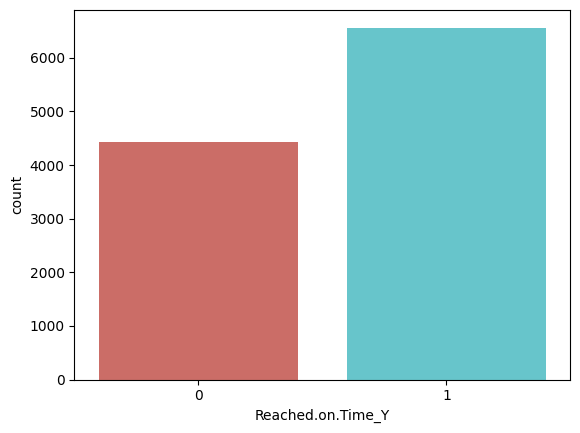

In [22]:
# Check for the distribution of the target variable in visual form with split columns
sns.countplot(x='Reached.on.Time_Y', data=df, palette='hls')
plt.show()


In [23]:
display(df.describe())

,ID,Customer_care_calls,Customer_rating,Product_Costs,Prior_purchases,Product_importance,Discount,Weight,Reached.on.Time_Y
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,0.604600,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,0.641464,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,1.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,2.000000,65.000000,7846.000000,1.000000


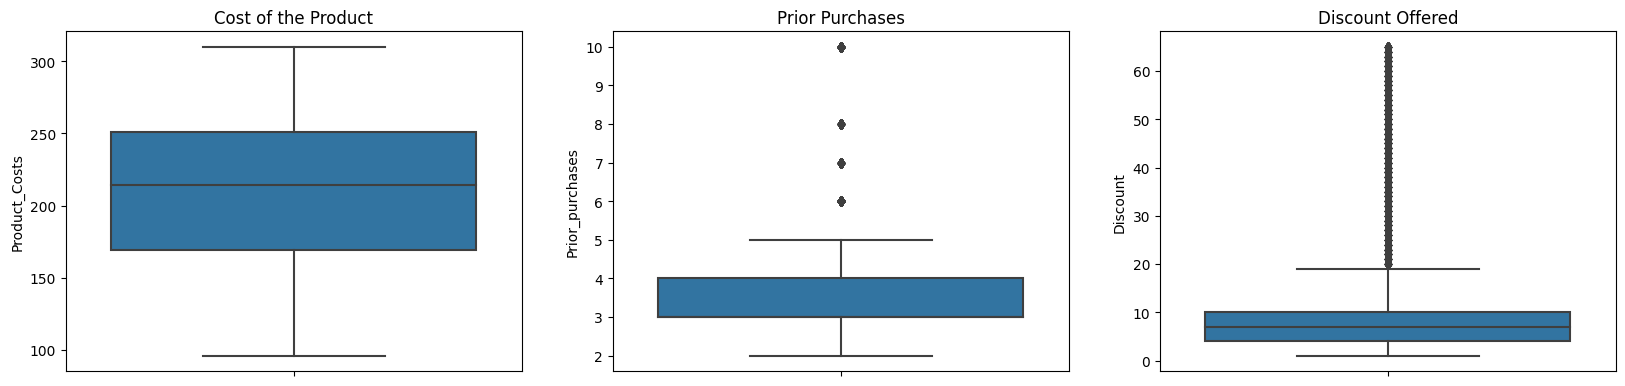

In [26]:
# visualizations
#outliers in split graphs
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.title('Cost of the Product')
sns.boxplot(y=df['Product_Costs'])
plt.subplot(3,3,2)
plt.title('Prior Purchases')
sns.boxplot(y=df['Prior_purchases'])
plt.subplot(3,3,3)
plt.title('Discount Offered')
sns.boxplot(y=df['Discount'])
plt.show()

In [ ]:

def clean_data(df):
    # Convert text to uppercase in column: 'Product_importance'
    df['Product_importance'] = df['Product_importance'].str.upper()
    return df

df_clean = clean_data(df.copy())
df_clean.head()